### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Exploration

In [2]:
data_raw = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data_raw.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data_raw.shape

(200, 5)

The Dataset belongs to the customer behavior in the mall. It has 200 rows and 5 features which include CustomerId, Age, Gender, Annual Income, SpendingScore(1-100). Spending score is something that relates to customer behavior and purchasing data. The objective is to segment the customers based on the spending.

In [4]:
data_raw.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data_raw.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Data Visulaization

#### Gender Count plot

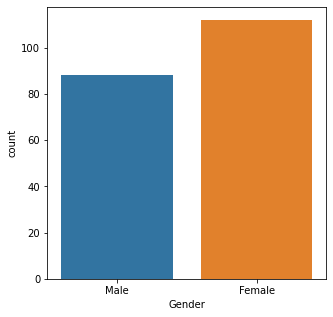

In [6]:
plt.figure(1, figsize=(5,5))
sns.countplot('Gender', data=data_raw)
plt.show()

#### Histograms of some features

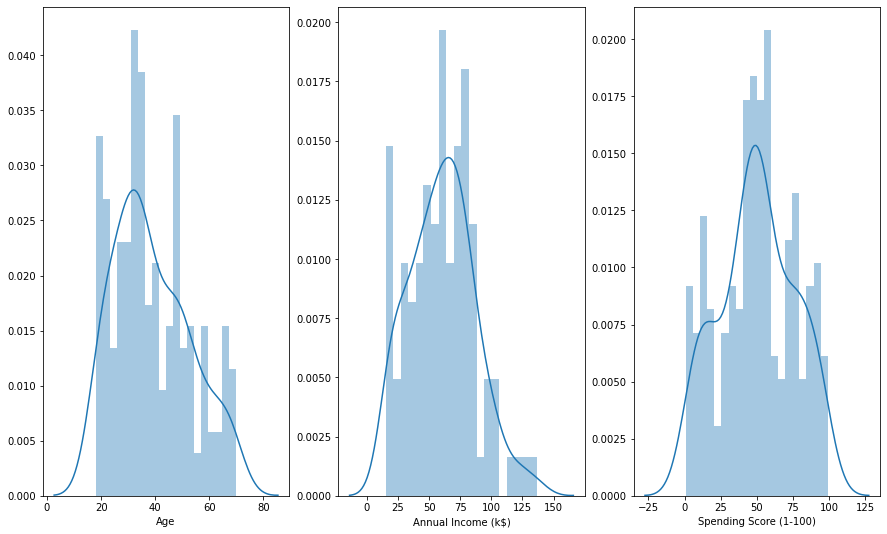

In [7]:
plt.figure(1, figsize=(15,9))
n=0
for col in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.distplot(data_raw[col], bins=20)
plt.show()

#### Pairplot of some features

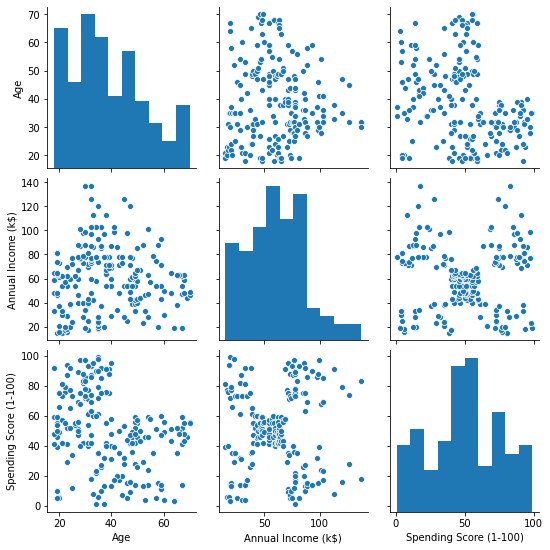

In [8]:
sns.pairplot(data_raw[['Age','Annual Income (k$)','Spending Score (1-100)']])

#### Regplot of some features

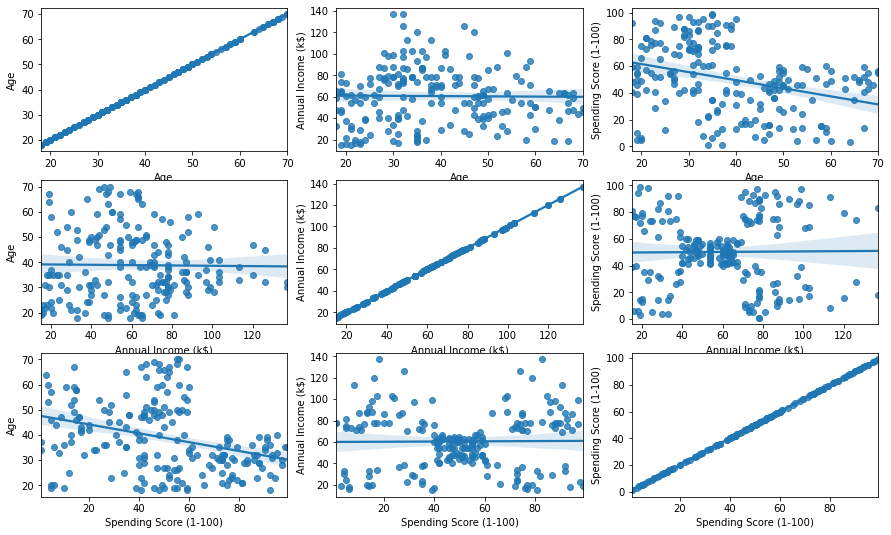

In [9]:
plt.figure(1, figsize=(15,9))
n=0
for x in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
        
        n+=1
        plt.subplot(3,3,n)
        sns.regplot(x=x, y=y, data=data_raw)
plt.show()

#### Gender wise comparison of Age and Annual Income

Text(0.5, 1.0, 'Gender wise comparison of Age and Annual Income')

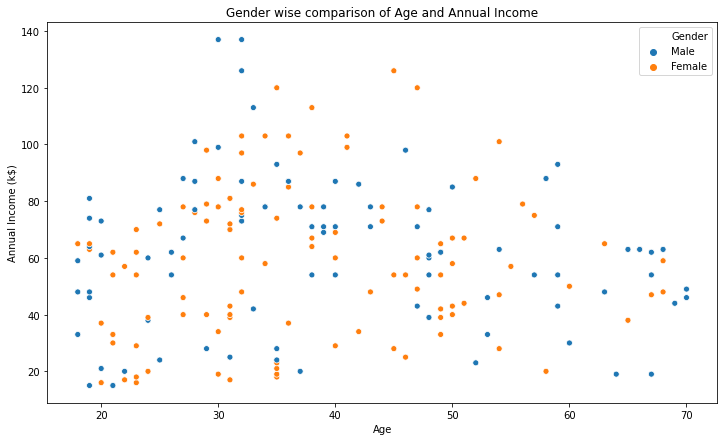

In [10]:
plt.figure(1, figsize=(12,7))
sns.scatterplot(data=data_raw, x='Age', y='Annual Income (k$)', hue='Gender')
plt.title("Gender wise comparison of Age and Annual Income")

#### Gender wise comparison of Spending Score and Annual Income

Text(0.5, 1.0, 'Gender wise comparison of Spending Score and Annual Income')

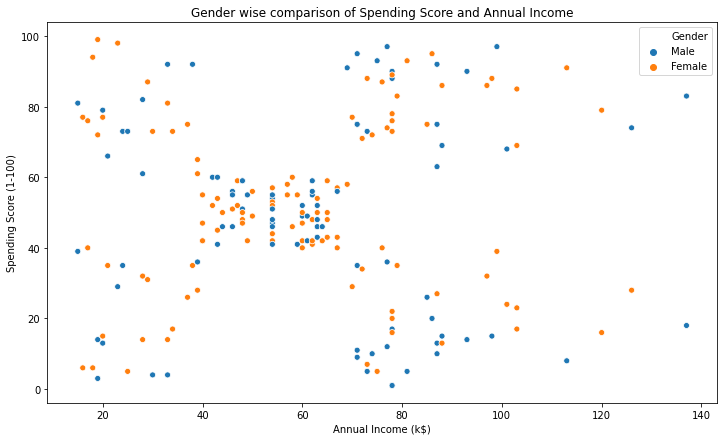

In [11]:
plt.figure(1, figsize=(12,7))
sns.scatterplot(data=data_raw, y='Spending Score (1-100)', x='Annual Income (k$)', hue='Gender')
plt.title("Gender wise comparison of Spending Score and Annual Income")

#### Distribution of some features

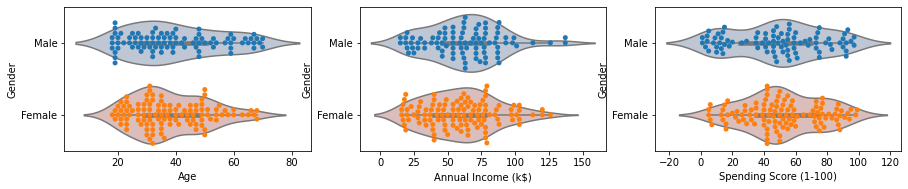

In [12]:
plt.figure(1, figsize=(15,9))
n=0
for col in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(3,3,n)
    sns.violinplot(data=data_raw, x=col, y='Gender', palette='vlag')
    sns.swarmplot(data=data_raw, x=col, y='Gender')
plt.show()


### Modelling

### Using K Means Clustering

### 1.Segmentation using Age and Spending Score

In [15]:
#Age and spending Score

from sklearn.cluster import KMeans

X1 = data_raw[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111) )
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

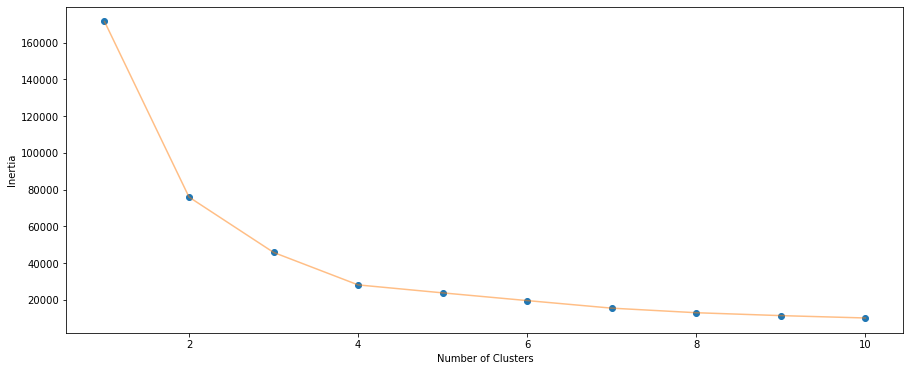

In [21]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111)
kmeans.fit(X1)
labels1 = kmeans.labels_
centriod1 = kmeans.cluster_centers_

In [24]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

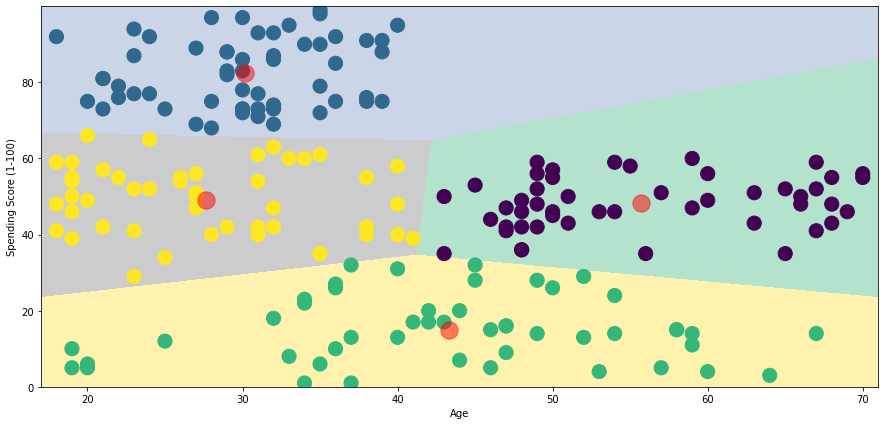

In [28]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data_raw , c = labels1 , 
            s = 200 )
plt.scatter(x = centriod1[: , 0] , y =  centriod1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### 2. Segmentation using Annual Income and Spending Score

In [34]:
#Annual Income and spending Score

from sklearn.cluster import KMeans

X2 = data_raw[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111) )
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

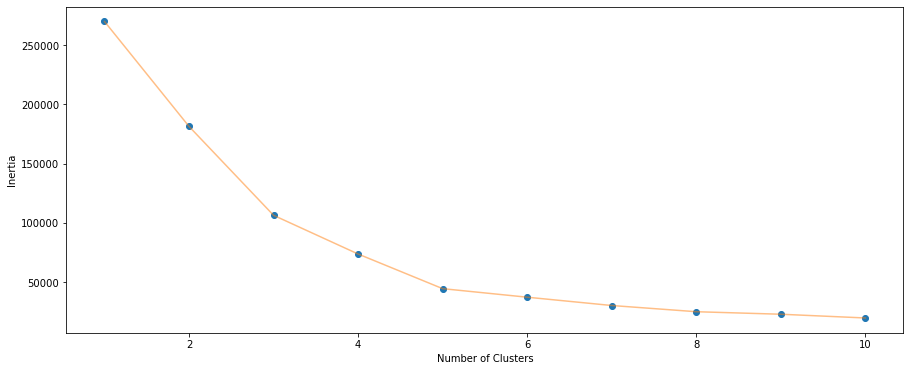

In [35]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111)
kmeans.fit(X2)
labels2 = kmeans.labels_
centriod2 = kmeans.cluster_centers_

In [38]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

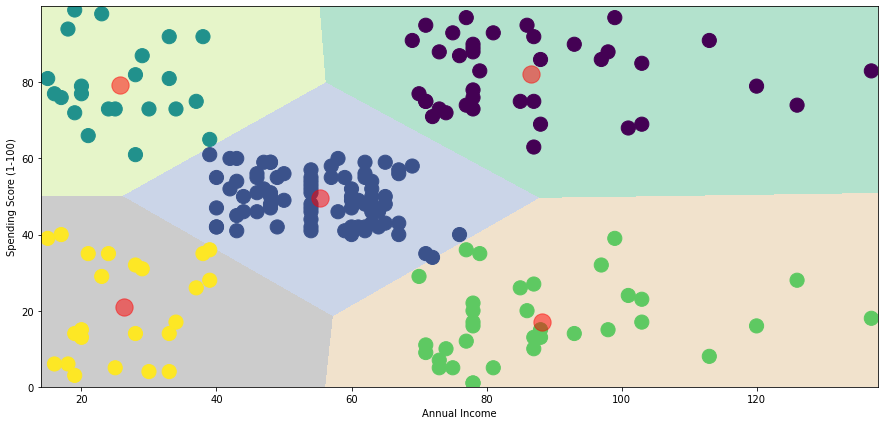

In [39]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data_raw , c = labels2 , 
            s = 200 )
plt.scatter(x = centriod2[: , 0] , y =  centriod2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income')
plt.show()

#### 3.Segmentation using Age , Annual Income and Spending Score

In [40]:
#Annual Income, Age and spending Score

from sklearn.cluster import KMeans

X3 = data_raw[['Age','Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111) )
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)

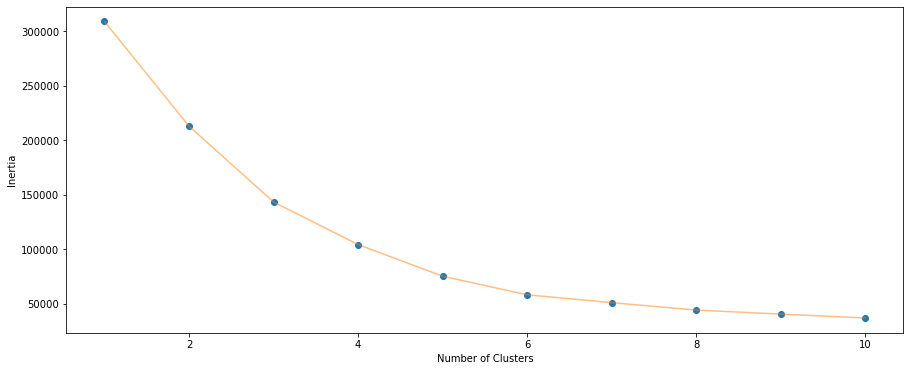

In [41]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111)
kmeans.fit(X3)
labels3 = kmeans.labels_
centriod3 = kmeans.cluster_centers_

In [47]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)


data_raw['label3'] =  labels3
trace1 = go.Scatter3d(
    x= data_raw['Age'],
    y= data_raw['Spending Score (1-100)'],
    z= data_raw['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data_raw['label3'], 
        size= 20,
        line=dict(
            color= data_raw['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)